<a href="https://colab.research.google.com/github/renatovicente/Modelos-Gerativos-Teoria-e-Pratica/blob/main/A1-Aprendizado_Como_Inferencia/templates/atividade_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 MAP5939 - Atividade Prática 01: Aprendizado como Inferência
**Professor:** Renato Vicente  
**Tópico:** Máxima Verossimilhança (MLE) e Forward KL

## 🎯 Objetivos
1. Implementar manualmente a log-verossimilhança de uma Gaussiana.
2. Utilizar gradiente descendente (via PyTorch) para encontrar os parâmetros de MLE.
3. Visualizar o fenômeno de **Mode Covering** (Forward KL) ao ajustar uma Gaussiana unimodal em dados bimodais.

## 1. Configuração do Ambiente
Primeiro, importamos as bibliotecas necessárias e configuramos a semente aleatória para reprodutibilidade.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.distributions import MultivariateNormal

# Configuração de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

# Reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

print("Ambiente configurado com sucesso!")

Ambiente configurado com sucesso!


## 2. Geração dos Dados (Toy Dataset)
Vamos gerar um dataset sintético 2D amostrando de uma Gaussiana com parâmetros conhecidos ($\mu_{true}, \Sigma_{true}$). O objetivo será recuperar esses parâmetros apenas olhando para os dados.

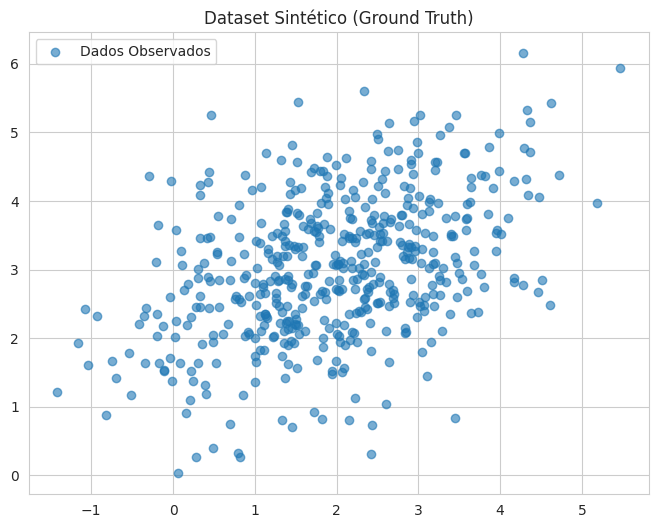

In [2]:
# Parâmetros Reais (Ground Truth)
true_mu = torch.tensor([2.0, 3.0])
true_sigma = torch.tensor([[1.5, 0.5],
                           [0.5, 1.0]])  # Matriz de Covariância Positiva Definida

# Geração de 500 amostras
n_samples = 500
dist = MultivariateNormal(true_mu, covariance_matrix=true_sigma)
X_train = dist.sample((n_samples,))

# Visualização
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.6, label='Dados Observados')
plt.title("Dataset Sintético (Ground Truth)")
plt.legend()
plt.show()

## 3. Implementação da Log-Verossimilhança

Sua tarefa é implementar a função que calcula a Log-Likelihood de uma Gaussiana Multivariada.
Lembre-se da fórmula para um ponto $\mathbf{x} \in \mathbb{R}^d$:

$$\log p(\mathbf{x} \mid \mu, \Sigma) = -\frac{d}{2}\log(2\pi) - \frac{1}{2}\log|\Sigma| - \frac{1}{2}(\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu)$$

Para o dataset inteiro (assumindo I.I.D.), somamos as log-probabilidades individuais.

> **Dica Numérica:** Para garantir que a matriz de covariância $\Sigma$ seja sempre positiva definida durante a otimização, otimizaremos uma matriz $L$ triangular inferior tal que $\Sigma = L L^T$ (Decomposição de Cholesky), ou, para simplificar neste exercício, assumiremos uma matriz diagonal $\Sigma = \text{diag}(e^{\mathbf{s}})$, otimizando o vetor $\mathbf{s}$ (log-variância).

In [ ]:
def log_likelihood_gaussian(x, mu, log_var):
    """
    Calcula a log-verossimilhança dos dados x sob uma Gaussiana N(mu, diag(exp(log_var))).

    Args:
        x: Tensor de dados [N, 2]
        mu: Tensor de média [2]
        log_var: Tensor com o log da variância diagonal [2]

    Returns:
        Um escalar (tensor) representando a soma da log-verossimilhança.
    """
    # --- TODO: ESCREVA SEU CÓDIGO AQUI ---
    # 1. Calcule a variância sigma^2 = exp(log_var)
    # 2. Implemente a fórmula da log-pdf (pode usar torch.sum, torch.log, etc)
    # 3. Retorne a soma sobre todos os pontos N

    # Dica: Cuidado com as dimensões. O resultado deve ser um número escalar negativo (ou positivo).

    pass # Remova e implemente
    # -------------------------------------

## 4. Otimização (MLE via Gradiente Descendente)

Agora vamos usar o otimizador `Adam` do PyTorch para maximizar a verossimilhança (ou minimizar a Negative Log-Likelihood).

In [ ]:
# 1. Inicialização Aleatória dos Parâmetros
mu_param = torch.randn(2, requires_grad=True)
log_var_param = torch.randn(2, requires_grad=True) # Inicializamos log(sigma^2)

# 2. Configurar Otimizador
optimizer = torch.optim.Adam([mu_param, log_var_param], lr=0.1)

# Loop de Treinamento
n_epochs = 1000
loss_history = []

print(f"Parâmetros Iniciais:\n Mu: {mu_param.data}\n Sigma: {torch.exp(log_var_param.data)}")

for epoch in range(n_epochs):
    optimizer.zero_grad()

    # --- TODO: Calcular a Loss ---
    # Lembre-se: Queremos MAXIMIZAR a Log-Likelihood.
    # Otimizadores do PyTorch MINIMIZAM funções.
    # Logo, Loss = - log_likelihood(...)

    # ll = log_likelihood_gaussian(X_train, mu_param, log_var_param) # Descomente após implementar
    # loss = -ll
    loss = torch.tensor(0.0, requires_grad=True) # Placeholder para não quebrar a execução inicial

    # Backpropagation
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: NLL = {loss.item():.4f}")

print("\n--- Treinamento Concluído ---")
print(f"Mu Recuperado: {mu_param.data}")
print(f"Mu Real: {true_mu}")
print(f"Sigma Diagonal Recuperado: {torch.exp(log_var_param.data)}")
print(f"Sigma Diagonal Real (aprox): {torch.diag(true_sigma)}")

# Plot da curva de convergência
plt.plot(loss_history)
plt.xlabel("Épocas")
plt.ylabel("Negative Log-Likelihood")
plt.title("Curva de Aprendizado")
plt.show()

## 5. Visualizando os Contornos

Vamos visualizar a densidade estimada sobreposta aos dados.

In [ ]:
def plot_density_contours(x_data, mu, var):
    """Auxiliar para plotar contornos de uma Gaussiana Diagonal"""
    # Grid para plotagem
    x_min, x_max = x_data[:, 0].min()-1, x_data[:, 0].max()+1
    y_min, y_max = x_data[:, 1].min()-1, x_data[:, 1].max()+1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100),
                            torch.linspace(y_min, y_max, 100), indexing='xy')
    grid = torch.stack([xx.flatten(), yy.flatten()], dim=1)

    # Calcular log_prob no grid
    # Nota: Recalculando manualmente para plot
    inv_var = 1.0 / var
    diff = grid - mu
    # Termo quadrático (Mahalanobis simples para diagonal)
    quad_term = (diff ** 2) * inv_var
    log_prob = -0.5 * (torch.sum(quad_term, dim=1) + torch.sum(torch.log(var)) + 2*np.log(2*np.pi))
    prob = torch.exp(log_prob).reshape(xx.shape)

    plt.contour(xx, yy, prob.detach().numpy(), levels=10, cmap='viridis', linewidths=2)
    plt.scatter(x_data[:, 0], x_data[:, 1], alpha=0.3, color='blue', label='Dados')
    plt.scatter(mu[0].detach(), mu[1].detach(), color='red', marker='x', s=100, label='Média Estimada')
    plt.legend()
    plt.title("Densidade Estimada (MLE)")

# Chamada da função
plot_density_contours(X_train, mu_param, torch.exp(log_var_param))
plt.show()

## 6. O Fenômeno de Mode Covering (Forward KL)

Nesta etapa, vamos criar um dataset **Bimodal** (duas nuvens separadas) e tentar ajustar nossa **Gaussiana Unimodal** nele.

Observe o que acontece com a média e a variância. O modelo ignora um dos modos? Ele fica no meio? Ele explode a variância?

In [ ]:
# 1. Gerar Dados Bimodais (Mistura de duas Gaussianas)
mu1 = torch.tensor([-3.0, -3.0])
mu2 = torch.tensor([3.0, 3.0])
sigma_common = 0.8 * torch.eye(2)

samples1 = MultivariateNormal(mu1, sigma_common).sample((200,))
samples2 = MultivariateNormal(mu2, sigma_common).sample((200,))
X_bimodal = torch.cat([samples1, samples2])

# Visualizar o problema
plt.figure(figsize=(6,6))
plt.scatter(X_bimodal[:,0], X_bimodal[:,1], alpha=0.5)
plt.title("Dados Bimodais")
plt.show()

# 2. Resetar Parâmetros e Otimizar
mu_mode = torch.zeros(2, requires_grad=True) # Começa na origem
log_var_mode = torch.zeros(2, requires_grad=True)
optimizer_mode = torch.optim.Adam([mu_mode, log_var_mode], lr=0.1)

print("Iniciando otimização em dados bimodais...")
for i in range(1000):
    optimizer_mode.zero_grad()
    # Loss = Negative Log Likelihood
    # ll = log_likelihood_gaussian(X_bimodal, mu_mode, log_var_mode) # Descomente quando implementar
    # (-ll).backward()
    loss_placeholder = torch.sum(mu_mode**2) # Apenas para rodar sem erro
    loss_placeholder.backward()

    optimizer_mode.step()

# 3. Visualizar Resultado
plt.figure(figsize=(8,6))
plot_density_contours(X_bimodal, mu_mode, torch.exp(log_var_mode))
plt.title("Forward KL: Efeito de Mode Covering")
plt.show()

### 🧠 Perguntas para Reflexão (Responda no Relatório)
1. Onde a média convergiu? Ela está sobre algum cluster de dados?
2. O que aconteceu com a variância estimada? Ela é pequena (focada) ou grande?
3. Relacione este resultado visual com a penalidade da Forward KL ($D_{KL}(P_{data} \| P_{\theta})$) discutida em aula: por que o modelo não escolheu apenas um dos modos?